# Analisis exploratorio de datos (EDA)

En este analisis vamos a ver:
- Que tipo de alquiler hay en cada barrio según el tipo de habitación.
- Que mínimo de noche se alquila segun el grupo de barrio
- Que rangos de precio se maneja según el grupo de barrio.
- Que precio hay según el tipo de habitación.


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest



> ### Pasos a seguir para una EDA.
>1º Acceder al csv.
>
>2º Convertirlo en dataframe df
>
>3º Solicitar toda la info
>
>4º Buscar duplicados y eliminarlos
>
>5º Limpiar datos innecesarios
>
>6º Analisis descriptivo



### 1º y 2º Acceder al csv y convertirlo en dataframe (df)


In [131]:
df_airbnb = pd.read_csv('/workspaces/sarayruiz---Machine-Learning/data/raw/internal-link.csv', sep=',')
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### 3º Solicitar toda la info

In [132]:
df_airbnb.shape


(48895, 16)

In [133]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [134]:
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [135]:
price_cero = (df_airbnb['price'] == 0).sum()

f"La columna 'price' tiene {price_cero} valores cero."

"La columna 'price' tiene 11 valores cero."

In [136]:
availability_cero = (df_airbnb['availability_365'] == 0).sum()

f"La columna 'availability_365' tiene {availability_cero} valores cero."

"La columna 'availability_365' tiene 17533 valores cero."

>### Observaciones:
>
> - Tenemos 48895 Filas y 16 Columnas a analizar.
> - Algunos de las filas contiene datos vacíos. 
> - Ya que observamos que columnas como last_review o reviews_per_month tiene menos datos.
> - Los datos cuentan con 10 características númericas y 6 característica categóricas.
> - Observamos que tenemos en precio un min de 0 por lo que nos da a entender que esa vivienda no se alquila. También nos sucede con la disponibilidad, si una vivienda no tiene dias disponible para alquilar, es que no la alquila y tiene el anuncio deshabilitado. Por lo que la eliminaremos más adelante.

### 4º Buscar duplicados y eliminarlos

In [137]:
df_airbnb.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [138]:
df_airbnb.drop("id", axis=1).duplicated().sum()

np.int64(0)

### 5º Limpiar datos innecesarios

In [139]:
# Vemos en primer lugar que barrios tenemos con que nº de datos. 
df_airbnb['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [140]:
# Paso los barrios a datos numericos para que puedan ser luego analizados.
df_airbnb['number_barrio'] = pd.factorize(df_airbnb['neighbourhood_group'])[0]
df_airbnb['number_barrio'].value_counts()

number_barrio
1    21661
0    20104
2     5666
4     1091
3      373
Name: count, dtype: int64

In [141]:
# Igualmente vemos que tipos de habitaciones tenemos con que nº de datos. 
df_airbnb['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [142]:
# Paso los tipos de habitaciones a  datos numericos para que puedan ser luego analizados.
df_airbnb['number_tipohab'] = pd.factorize(df_airbnb['room_type'])[0]
df_airbnb['number_tipohab'].value_counts()


number_tipohab
1    25409
0    22326
2     1160
Name: count, dtype: int64

In [143]:
# Creamos un json donde ver que número se le ha dado al barrio.
airbnb_transformation_rulesbarrio = {row['neighbourhood_group']: row['number_barrio'] for _, row in df_airbnb.iterrows()}
airbnb_transformation_rulesbarrio


{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}

In [144]:
with open('../data/processed/airbnb-transformation-rulesbarrio.json', 'w') as file:
    json.dump(airbnb_transformation_rulesbarrio, file)


In [145]:
# Creamos un json donde ver que número se le ha dado a los tipos de habitación.
airbnb_transformation_ruleshab = {row['room_type']: row['number_tipohab'] for _, row in df_airbnb.iterrows()}
airbnb_transformation_ruleshab

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}

In [146]:
with open('../data/processed/airbnb-transformation-ruleshab.json', 'w') as file:
    json.dump(airbnb_transformation_ruleshab, file)

In [147]:
df = df_airbnb.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type',  'number_of_reviews', 'last_review', 
                    'reviews_per_month', 'calculated_host_listings_count'], axis=1)
df


,price,minimum_nights,availability_365,number_barrio,number_tipohab
0,149,1,365,0,0
1,225,1,355,1,1
2,150,3,365,1,0
3,89,1,194,0,1
4,80,10,0,1,1
...,...,...,...,...,...
48890,70,2,9,0,0
48891,40,4,36,0,0
48892,115,10,27,1,1
48893,55,1,2,1,2


> ### Eliminamos filas a 0 del precio y de los días disponible:
> Ya que determinamos que si el precio de la noche es a 0€, es que no lo está alquilando así como los que no tienen disponibilidad, si no tienes días habilitados es que tiene un anuncio subido
> pero inhabilitado para alquilar. Por lo que estos datos no nos validos para un analisis.

In [148]:
df.drop(index=df.index[df["price"].eq(0)], inplace=True) 
df["price"]

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48884, dtype: int64

In [149]:
df.drop(index=df.index[df['availability_365'].eq(0)], inplace=True)
df['availability_365']

0        365
1        355
2        365
3        194
5        129
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 31354, dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31354 entries, 0 to 48894
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             31354 non-null  int64
 1   minimum_nights    31354 non-null  int64
 2   availability_365  31354 non-null  int64
 3   number_barrio     31354 non-null  int64
 4   number_tipohab    31354 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB


### 6º Analisis descriptivo

> ### Variables Categóricas
> Vamos a ver en primer lugar que %  hay en cada barrio según el tipo de habitación.

In [ ]:
# TODO quiero analizar:
# 
# - Que tipo de alquiler hay en cada barrio según el tipo de habitación.
# - Que mínimo de noche se alquila segun el grupo de barrio
# - Que rangos de precio se maneja según el grupo de barrio.
# - Que precio hay según el tipo de habitación.

 #0   price             31354 non-null  int64
 #1   minimum_nights    31354 non-null  int64
 #2   availability_365  31354 non-null  int64
 #3   number_barrio     31354 non-null  int64
 #4   number_tipohab    31354 non-null  int64

In [167]:
mapa_barrios = {0: "Brooklyn", 1: "Manhattan", 2: "Queens", 3: "Staten Island", 4: "Bronx"}
mapa_habitaciones = {0: "Private room", 1: "Entire home/apt", 2: "Shared room"}

data_proporcion = (df
                   .groupby('number_barrio')['number_tipohab']
                   .value_counts(normalize=True)  # <-- PASO CLAVE 1: Normaliza a proporción (0 a 1)
                   .mul(100)                      # <-- PASO CLAVE 2: Multiplica por 100 para obtener el porcentaje
                   .rename('porcentaje')          # <-- Se guarda el resultado en la columna 'porcentaje'
                   .reset_index())

df['nombre_barrio'] = df['number_barrio'].map(mapa_barrios)
df['nombre_habitacion'] = df['number_tipohab'].map(mapa_habitaciones)

plt.figure(figsize=(10, 5))
sns.barplot(x='nombre_barrio', y='porcentaje', hue='nombre_habitacion', data=data_proporcion)     
plt.title('Distribución Porcentual de Tipos de Habitaciones por Barrio')
plt.xlabel('Barrios')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Habitación', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `nombre_barrio` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>

> Observaciones:
> - En el barrio de Brooklyn vemos un % parecido entre Apartamentos enteros y habitaciones privadas
> - En Manhattan los anuncios que más abundan son de Apartamentos privados.
> - En Queens, State Island y Bronx se estilan las habitaciones privadas.



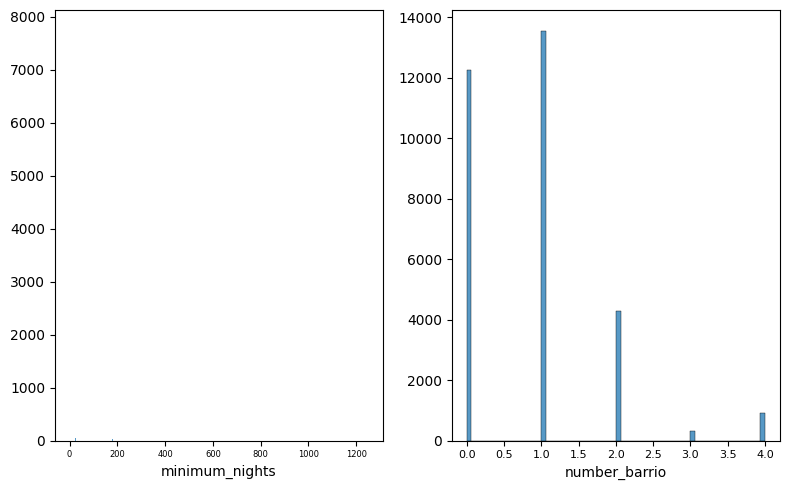

In [ ]:
mapa_barrios = {0: "Brooklyn", 1: "Manhattan", 2: "Queens", 3: "Staten Island", 4: "Bronx"}

data_grafico['nombre_barrio'] = data_grafico['number_barrio'].map(mapa_barrios)

plt.figure(figsize=(10, 5))
sns.barplot(x='nombre_barrio', y='minimum_nights', hue='nombre_habitacion', data=data_grafico)     
plt.title('Distribución Porcentual de Tipos de Habitaciones por Barrio')
plt.xlabel('Barrios')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Habitación', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

>### Observaciones
> - El barrio donde más viviendas de Airbnb hay es en Manhattan
> - Lo que más se reserva son Apartamentos y casas enteros, seguidos de habitaciones privadas.

In [153]:
# Consulto los max de varias columnas para determinar que gráfico usar.
valor_maximo = df_airbnb["price"].max()
valor_maximo

np.int64(10000)

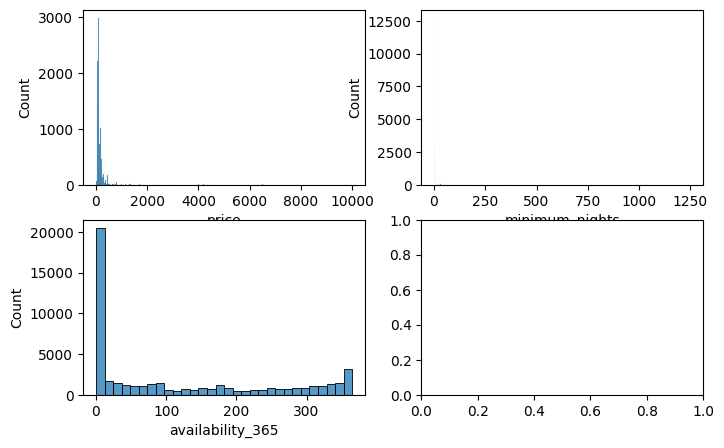

In [154]:
# Variables Numéricas 1º

fig, axis = plt.subplots(2, 2, figsize=(8, 5))

sns.histplot(ax=axis[0, 0], data=df_airbnb, x="price")
sns.histplot(ax=axis[0, 1], data=df_airbnb, x="minimum_nights")
sns.histplot(ax=axis[1, 0], data=df_airbnb, x="availability_365")
plt.show()

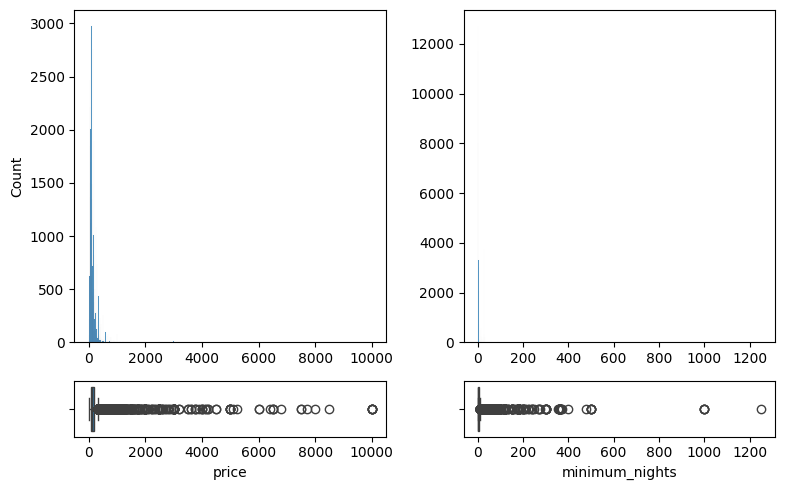

In [155]:
# Variables Numéricas 2º

fig, axis = plt.subplots(2, 2, figsize=(8, 5), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=df_airbnb, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df_airbnb, x="price")
sns.histplot(ax=axis[0, 1], data=df_airbnb, x="minimum_nights").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df_airbnb, x="minimum_nights")

plt.tight_layout()
plt.show()

In [156]:
# TODO Falta Markdown de observaciones de las Variables Numericas.

> ### Falta observaciones

In [157]:
# Analisis de Variables Multivariables

# Generamos las correlaciones
corr_survived_fare = df[["Survived", "Fare"]].corr()
corr_survived_age = df[["Survived", "Age"]].corr()

# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.regplot(ax=axis[0, 0], data=df, x="Fare", y="Survived", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_survived_fare, annot=True, fmt=".2f", cbar=False)

sns.regplot(ax=axis[0, 1], data=df, x="Age", y="Survived", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_survived_age, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Survived', 'Fare'], dtype='object')] are in the [columns]"